In [1]:
#sophia walton
#linear regression of high school data

In [2]:
#import statements
import pandas as pd
import seaborn as sb
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
hsdata = pd.read_csv('/Users/sophiawalton/Downloads/hs_dem_data - school numbers data.csv')
hsframe = pd.DataFrame(hsdata)
print(hsframe)

                  school  white  black  hispanic  asian  multiple  other  \
0     charlottesville hs   46.4   28.6      12.7    5.6       6.6    0.1   
1   western albemarle hs   87.0    1.8       5.1    2.4       3.6    0.2   
2           albemarle hs   55.1   15.8      14.7    8.2       6.2    0.2   
3     fluvanna county hs   72.5   15.1       5.8    0.4       6.0    0.2   
4       nelson county hs   72.6   13.2       7.7    0.2       5.7    0.5   
5      william monroe hs   71.3    7.5      10.7    2.0       8.3    0.2   
6          monticello hs   63.5   11.2      15.3    3.1       6.8    0.1   
7   buckingham county hs   54.5   35.4       3.3    0.5       6.3    0.0   
8      orange county hs    68.4   13.1       9.2    0.9       7.8    0.8   
9     culpeper county hs   58.8   11.7      22.6    2.1       4.2    0.7   
10      eastern view hs    50.5   15.2      25.0    1.6       7.2    0.4   
11       rappahannock hs   85.5    2.9       6.4    0.0       4.9    0.3   
12     madis

In [4]:
#classify for different colors as reference:
#1: over 70% white
#2: less than 70 percent white and black greater than hispanic
#3: less than 70 percent white and hispanic greater than black
classifications = []
for index, row in hsframe.iterrows():
    if row['white'] > 70:
        classifications.append(1)
    elif row['black/hispanic difference'] >=0:
        classifications.append(2)
    else:
        classifications.append(3)

In [5]:
#add classifications to the dataframe
hsframe['classifications']=classifications
white=hsframe.groupby('classifications').get_group(1)
black=hsframe.groupby('classifications').get_group(2)
hispanic=hsframe.groupby('classifications').get_group(3)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
#assign column values for linear regression
x_column = hsframe.loc[:,'white']
x = x_column.values
x=x.reshape(-1, 1)
y_column = hsframe.loc[:, 'free/reduced lunch']
y = y_column.values
y= y.reshape(-1, 1)

In [8]:
reg = LinearRegression().fit(x, y)
print(reg.score(x,y))
m = reg.coef_
b = reg.intercept_

0.16053096093557473


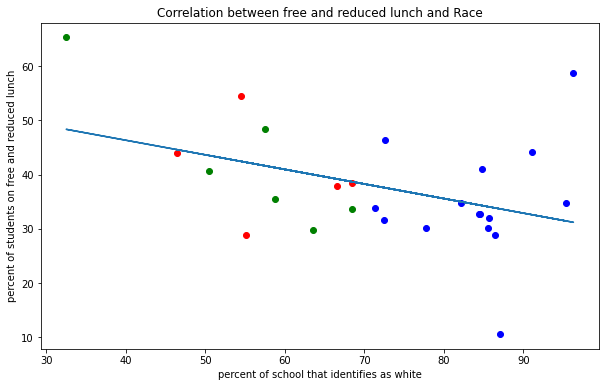

In [9]:
#sort by classification and put into a dot plot

fig, hsdatascatter = plt.subplots(figsize=(10, 6))

hsdatascatter.scatter(x = black['white'], y = black['free/reduced lunch'], color ='red')
hsdatascatter.scatter(x = white['white'], y = white['free/reduced lunch'], color ='blue')
hsdatascatter.scatter(x = hispanic['white'], y = hispanic['free/reduced lunch'], color ='green')
plt.plot(x, m*x + b)
plt.xlabel("percent of school that identifies as white")
plt.ylabel("percent of students on free and reduced lunch")
plt.title("Correlation between free and reduced lunch and Race")

plt.show()